# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv() #!! Get help with ignoring api keys with .gitignore !!

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_df = requests.get(btc_url).json()
btc_price = btc_df['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_df = requests.get(eth_url).json()
eth_price = eth_df['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44996.40
The current value of your 5.3 ETH is $10695.29


In [6]:
btc_df

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19548425,
   'total_supply': 19548425,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 37497.0,
     'volume_24h': 20675515486,
     'market_cap': 732381469460,
     'percentage_change_1h': -0.213353792812636,
     'percentage_change_24h': 0.936389687238062,
     'percentage_change_7d': 2.84410963204923,
     'percent_change_1h': -0.213353792812636,
     'percent_change_24h': 0.936389687238062,
     'percent_change_7d': 2.84410963204923}},
   'last_updated': 1700540950}},
 'metadata': {'timestamp': 1700540950,
  'num_cryptocurrencies': 3119,
  'error': None}}

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_API_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2')

In [9]:
# Format current date as ISO format
current_day = pd.Timestamp("11/17/2023", tz="America/New_York").isoformat()

# Set the tickers
stocks = ["SPY", "AGG"]

# Set timeframe to "1Day" for Alpaca API
tf = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    stocks,
    tf,
    start = current_day,
    end = current_day
).df

# Reorganize the DataFrame
# Separate ticker data
df_portfolio.reset_index(inplace = True)
df_portfolio.set_index('symbol', inplace = True)

# spy_data = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop(columns= 'symbol')
# agg_data = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop(columns= 'symbol')
# spy_data.reset_index(inplace= True)
# agg_data.reset_index(inplace= True)
# Concatenate the ticker DataFrames
# Trick?

# Preview DataFrame
df_portfolio

,timestamp,close,high,low,trade_count,open,volume,vwap
symbol,,,,,,,,
AGG,2023-11-17 05:00:00+00:00,95.25,95.36,95.025,27266,95.21,9244030,95.213371
SPY,2023-11-17 05:00:00+00:00,450.79,451.42,449.290,439332,450.24,83183079,450.530471


In [10]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio.loc['AGG', 'close'] #.loc becuase it is a int we are grabbing with the column name
spy_close_price = df_portfolio.loc['SPY', 'close'] #.iloc if we wanted the index place of the column


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.25
Current SPY closing price: $450.79


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22539.50
The current value of your 200 AGG shares is $19050.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
Consolidated_Financial_Assets = round(my_agg_value + my_spy_value, 2)
Consolidated_Crypto_Assets = my_btc_value + my_eth_value
# Create savings DataFrame
df_savings = pd.DataFrame(
    {
    'amount': [Consolidated_Crypto_Assets, Consolidated_Financial_Assets]
}, index=['crypto', 'shares']
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,55691.694
shares,41589.500


array([<Axes: ylabel='amount'>], dtype=object)

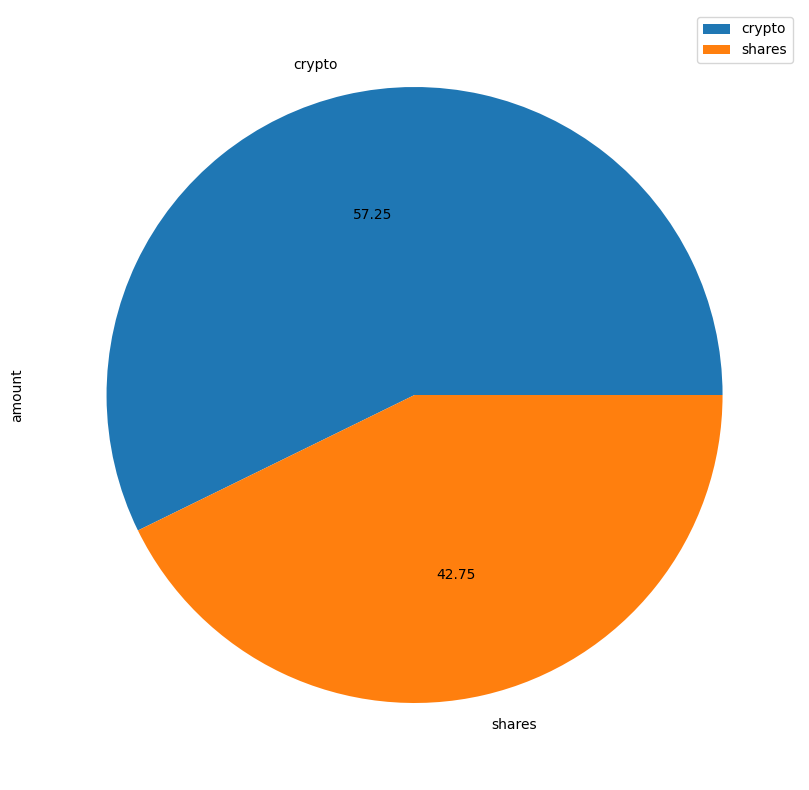

In [13]:
# Plot savings pie chart
df_savings.plot.pie(
    figsize = (15, 10),
    subplots= True,
    autopct="%.2f"
    )

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
print(total_savings)
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in this fund!")
if total_savings == emergency_fund:
    print("Congratulations on meeting your goal for your emrgency fund!")
if total_savings < emergency_fund:
    deficit = total_savings - emergency_fund
    print(f"You are ${deficit} away from reaching your financial goal. Keep it up!")


97281.194
Congratulations! You have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-11-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-11-17', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
stocks = ["SPY", "AGG"]
tf = "1D"
df_stock_data = alpaca.get_bars(
    stocks,
    tf,
    start = start_date,
    end = end_date
).df
# Get current closing prices for SPY and AGG
closing_prices_spy = df_stock_data['close']

# Reorganize the DataFrame
# Separate ticker data
spy_data2 = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop(columns= 'symbol')
agg_data2 = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop(columns= 'symbol')
spy_data2.reset_index(inplace= True)
agg_data2.reset_index(inplace= True)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([spy_data2, agg_data2], axis=1, keys=['SPY', 'AGG'])


# Display sample data
df_stock_data.head()

SPY                                                \
                  timestamp   close      high     low trade_count    open   
0 2018-11-19 05:00:00+00:00  269.12  273.3800  268.07      492976  273.05   
1 2018-11-20 05:00:00+00:00  264.15  267.0000  263.15      666892  265.36   
2 2018-11-21 05:00:00+00:00  265.03  267.1500  265.01      347443  265.86   
3 2018-11-23 05:00:00+00:00  263.32  264.8234  263.07      190709  263.18   
4 2018-11-26 05:00:00+00:00  267.43  267.7500  265.34      341212  265.78   

                                               AGG                            \
      volume        vwap                 timestamp   close      high     low   
0  104845636  269.922035 2018-11-19 05:00:00+00:00  104.65  104.7299  104.61   
1  137953946  265.195482 2018-11-20 05:00:00+00:00  104.61  104.7200  104.61   
2   77283500  265.829729 2018-11-21 05:00:00+00:00  104.67  104.6900  104.58   
3   44012132  263.921432 2018-11-23 05:00:00+00:00  104.65  104.8400  104.65   
4   81413911  266.566378 2018-11-26 05:00:00+00:00  104.63  104.6700  104.59   

                                            
  trade_count    open   volume        vwap  
0       12499  104.61  5002416  104.669666  
1       12627  104.67  3348454  104.652930  
2       14025  104.60  5886673  104.638034  
3        5751  104.84  1801343  104.713743  
4       11867  104.67  4992135  104.628152

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                                \
                  timestamp   close      high     low trade_count    open   
0 2018-11-19 05:00:00+00:00  269.12  273.3800  268.07      492976  273.05   
1 2018-11-20 05:00:00+00:00  264.15  267.0000  263.15      666892  265.36   
2 2018-11-21 05:00:00+00:00  265.03  267.1500  265.01      347443  265.86   
3 2018-11-23 05:00:00+00:00  263.32  264.8234  263.07      190709  263.18   
4 2018-11-26 05:00:00+00:00  267.43  267.7500  265.34      341212  265.78   

                                                            AGG          \
      volume        vwap daily_return                 timestamp   close   
0  104845636  269.922035          NaN 2018-11-19 05:00:00+00:00  104.65   
1  137953946  265.195482    -0.018468 2018-11-20 05:00:00+00:00  104.61   
2   77283500  265.829729     0.003331 2018-11-21 05:00:00+00:00  104.67   
3   44012132  263.921432    -0.006452 2018-11-23 05:00:00+00:00  104.65   
4   81413911  266.566378     0.015608 2018-11-26 05:00:00+00:00  104.63   

                                                                           
       high     low trade_count    open   volume        vwap daily_return  
0  104.7299  104.61       12499  104.61  5002416  104.669666          NaN  
1  104.7200  104.61       12627  104.67  3348454  104.652930    -0.000382  
2  104.6900  104.58       14025  104.60  5886673  104.638034     0.000574  
3  104.8400  104.65        5751  104.84  1801343  104.713743    -0.000191  
4  104.6700  104.59       11867  104.67  4992135  104.628152    -0.000191

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Thirty_year_returns = MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 110.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 120.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 130.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 140.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 150.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 160.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 170.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 180.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 190.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 200.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 210.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 220.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 230.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 240.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 250.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 260.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 270.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 280.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 290.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 300.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 310.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 320.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 330.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 340.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 350.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 360.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 370.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 380.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 390.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 400.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 410.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 420.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 430.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 440.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 450.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 460.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 470.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 480.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

Running Monte Carlo simulation number 490.


c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Inst

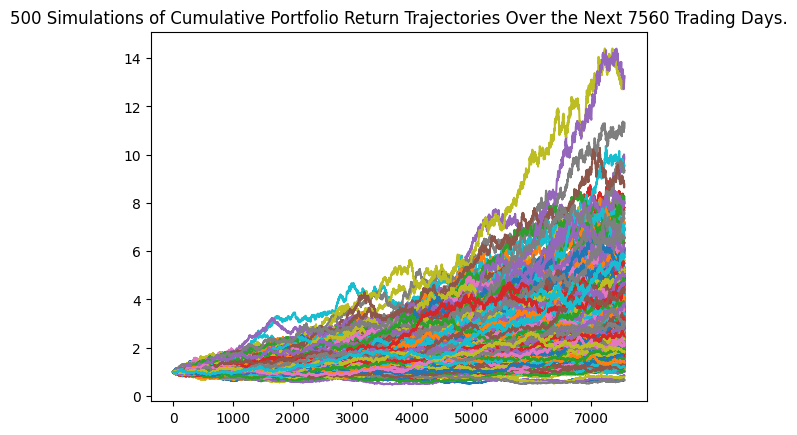

In [20]:
# Plot simulation outcomes
sim_outcome = MC_thirtyyear.plot_simulation()


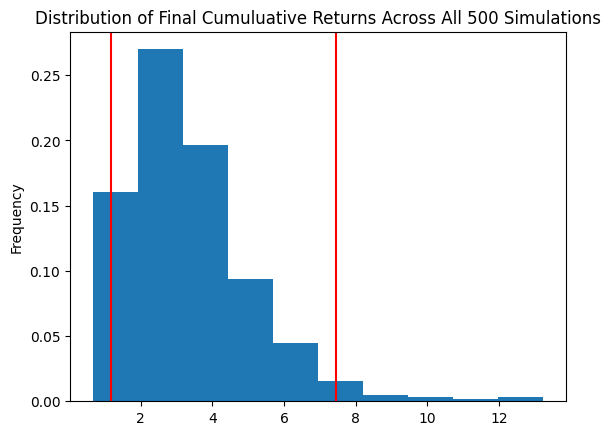

In [21]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
summary_stats

c:\Users\Gino\OneDrive\Desktop\Fintech-Bootcamp-\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              3.329905
std               1.742750
min               0.651778
25%               2.080157
50%               2.984161
75%               4.200162
max              13.248626
95% CI Lower      1.162503
95% CI Upper      7.457179
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = Thirty_year_returns.quantile(0.025, axis=1).iloc[-1]
ci_upper = Thirty_year_returns.quantile(0.975, axis=1).iloc[-1]
lower_bound_investment = initial_investment * ci_lower
upper_bound_investment = initial_investment * ci_upper
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_bound_investment} and ${upper_bound_investment}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $23250.069333072035 and $149143.57451367975


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
inc_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = Thirty_year_returns.quantile(0.025, axis=1).iloc[-1]
ci_upper2 = Thirty_year_returns.quantile(0.975, axis=1).iloc[-1]
lower_bound_investment2 = inc_initial_investment * ci_lower2
upper_bound_investment2 = inc_initial_investment * ci_upper2

# Print results
print(f"There is a 95% chance that an initial investment of ${inc_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_bound_investment2} and ${upper_bound_investment2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $34875.10399960806 and $223715.3617705196


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [30]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")